In [2]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
  
# fetch dataset 
concrete_compressive_strength = fetch_ucirepo(id=165) 
  
# data (as pandas dataframes) 
X = concrete_compressive_strength.data.features 
y = concrete_compressive_strength.data.targets 
  
# metadata 
print(concrete_compressive_strength.metadata) 
  
# variable information 
print(concrete_compressive_strength.variables) 


{'uci_id': 165, 'name': 'Concrete Compressive Strength', 'repository_url': 'https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength', 'data_url': 'https://archive.ics.uci.edu/static/public/165/data.csv', 'abstract': 'Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. ', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1030, 'num_features': 8, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Concrete compressive strength'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sun Feb 11 2024', 'dataset_doi': '10.24432/C5PK67', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 383, 'type': 'NATIVE', 'title': 'Modeling of strength of high-performance concrete using artificial neural networks', 'authors': 'I. Yeh', 'venue': 'C

In [3]:
from sklearn.model_selection import train_test_split

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)


LinearRegression()

In [5]:
from sklearn.metrics import mean_squared_error

# Predict on test set
y_pred_linear = linear_model.predict(X_test)

# Compute Mean Squared Error
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Linear Regression MSE: {mse_linear}")


Linear Regression MSE: 95.97094009110684


In [6]:
# Compute R² score
r2_linear = linear_model.score(X_test, y_test)
print(f"Linear Regression R²: {r2_linear}")


Linear Regression R²: 0.6275531792314848


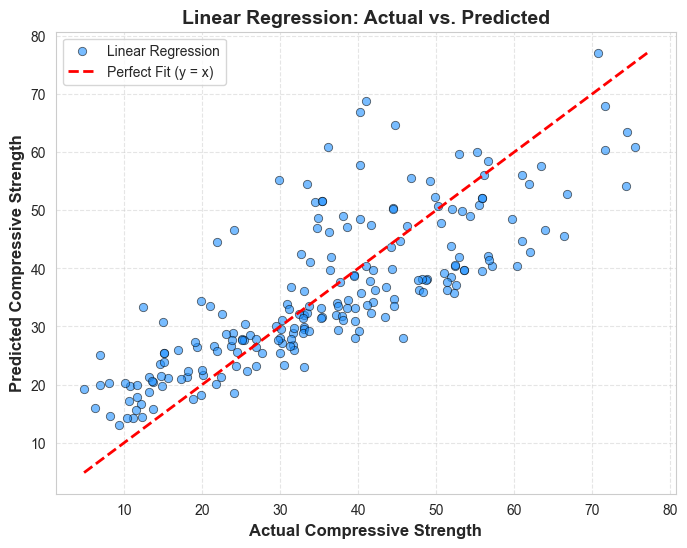

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert to numpy arrays
y_test_array = np.array(y_test).flatten()
y_pred_linear_array = np.array(y_pred_linear).flatten()
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# Scatter plot
plt.scatter(y_test_array, y_pred_linear_array, alpha=0.6, label="Linear Regression", 
            color='dodgerblue', edgecolors='black', linewidth=0.6)

# Add a reference line (y = x)
min_val = min(y_test_array.min(), y_pred_linear_array.min())
max_val = max(y_test_array.max(), y_pred_linear_array.max())

plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='dashed', 
         linewidth=2, label="Perfect Fit (y = x)")

# Show Plots
plt.xlabel("Actual Compressive Strength", fontsize=12, fontweight='bold')
plt.ylabel("Predicted Compressive Strength", fontsize=12, fontweight='bold')
plt.title("Linear Regression: Actual vs. Predicted", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [8]:
from sklearn.preprocessing import PolynomialFeatures

# Function to transform features and train model
def polynomial_regression(degree):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    return model, X_test_poly


In [9]:
models = {}
for degree in [2, 3, 4]:
    model, X_test_poly = polynomial_regression(degree)
    models[degree] = (model, X_test_poly)


In [10]:
for degree, (model, X_test_poly) in models.items():
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Polynomial Regression (degree {degree}) MSE: {mse}")


Polynomial Regression (degree 2) MSE: 55.582457880484704
Polynomial Regression (degree 3) MSE: 40.297727214223045
Polynomial Regression (degree 4) MSE: 984.0655122570942


In [11]:
for degree, (model, X_test_poly) in models.items():
    r2 = model.score(X_test_poly, y_test)
    print(f"Polynomial Regression (degree {degree}) R²: {r2}")


Polynomial Regression (degree 2) R²: 0.7842939778600257
Polynomial Regression (degree 3) R²: 0.8436114060059621
Polynomial Regression (degree 4) R²: -2.8189901143008376


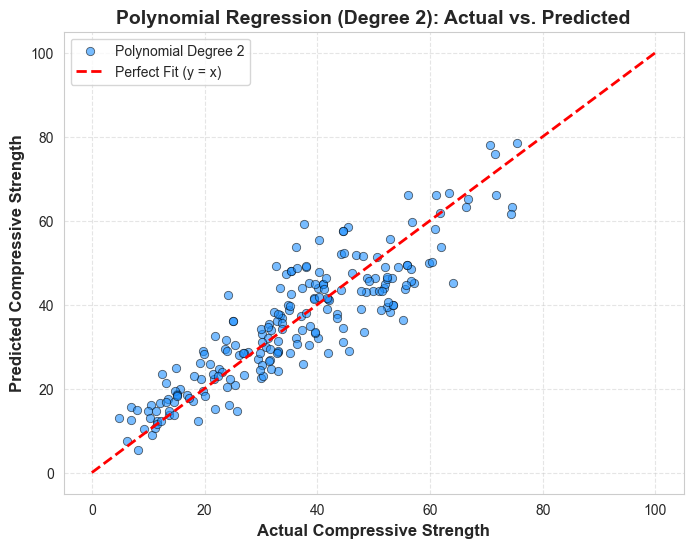

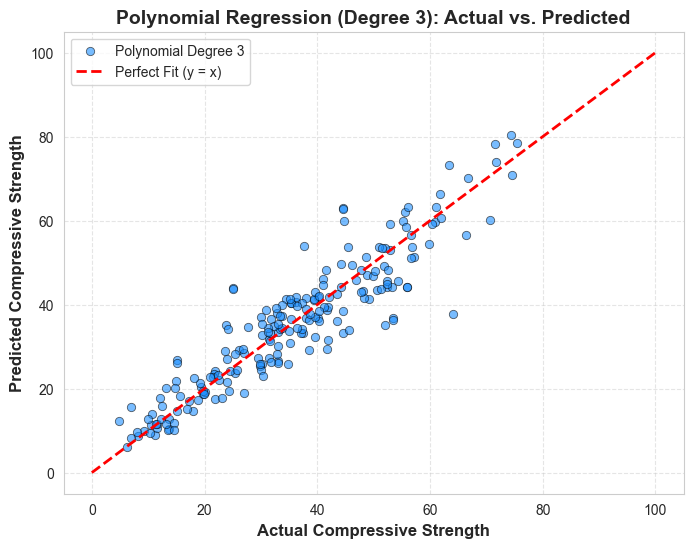

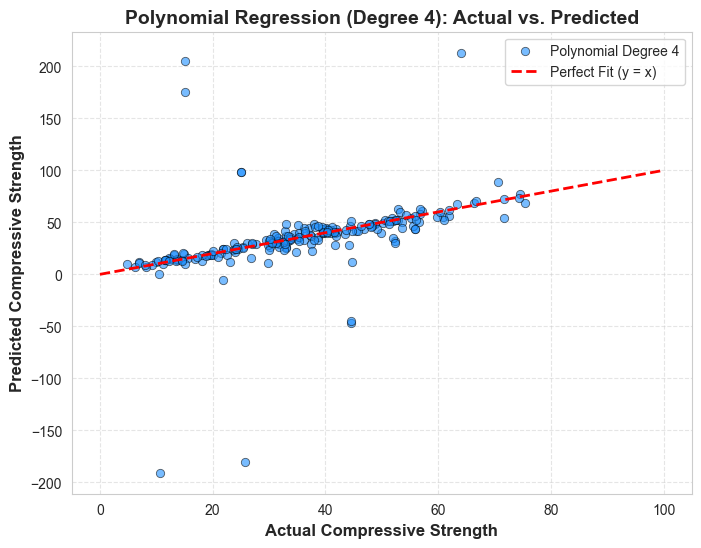

In [ ]:

y_test_array = np.array(y_test).flatten()

# Function to generate scatter plots for Polynomial Regression
def plot_polynomial_results(y_test, y_pred, degree):
    plt.figure(figsize=(8, 6))
    sns.set_style("whitegrid")

    # Scatter plot
    plt.scatter(y_test, y_pred, alpha=0.6, label=f"Polynomial Degree {degree}", 
                color='dodgerblue', edgecolors='black', linewidth=0.6)

    # Add a reference line (y = x) for perfect predictions
    plt.plot([0, 100], [0, 100], color='red', linestyle='dashed', 
             linewidth=2, label="Perfect Fit (y = x)")

   
    plt.xlabel("Actual Compressive Strength", fontsize=12, fontweight='bold')
    plt.ylabel("Predicted Compressive Strength", fontsize=12, fontweight='bold')
    plt.title(f"Polynomial Regression (Degree {degree}): Actual vs. Predicted", fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

for degree, (model, X_test_poly) in models.items():
    y_pred_poly = model.predict(X_test_poly)
    plot_polynomial_results(y_test_array, y_pred_poly, degree)


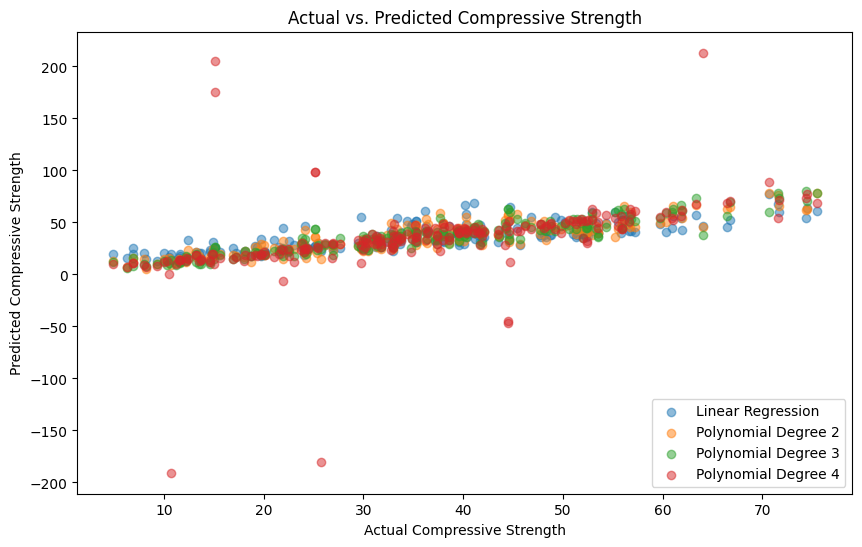

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.5, label='Linear Regression')
for degree, (model, X_test_poly) in models.items():
    y_pred = model.predict(X_test_poly)
    plt.scatter(y_test, y_pred, alpha=0.5, label=f'Polynomial Degree {degree}')
plt.xlabel("Actual Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.title("Actual vs. Predicted Compressive Strength")
plt.legend()
plt.show()


In [14]:
results = {
    'Model': ['Linear Regression'] + [f'Polynomial Degree {degree}' for degree in models.keys()],
    'MSE': [mse_linear] + [mean_squared_error(y_test, model.predict(X_test_poly)) for model, X_test_poly in models.values()],
    'R²': [r2_linear] + [model.score(X_test_poly, y_test) for model, X_test_poly in models.values()]
}
results_df = pd.DataFrame(results)
print(results_df)


                 Model         MSE        R²
0    Linear Regression   95.970940  0.627553
1  Polynomial Degree 2   55.582458  0.784294
2  Polynomial Degree 3   40.297727  0.843611
3  Polynomial Degree 4  984.065512 -2.818990


## Bias-Variance Tradeoff Analysis

### **Understanding the Bias-Variance Tradeoff**
The tradeoff between bias and variance determines how well a model generalizes to unseen data:

- **High bias (Underfitting):** The model is too simplistic, failing to capture patterns in the data.
- **High variance (Overfitting):** The model is too complex, fitting noise in the training data instead of general trends.

### **1. Which model has high bias and low variance?**
The **linear regression model** has **high bias and low variance**. Since it assumes a strict linear relationship, it may not capture complex patterns in the data. This results in **underfitting**, where the model makes large errors across both training and test sets.

Mathematically, bias is defined as:

$$ \beta^2 = (\mathbb{E}[\hat{f}(x)] - f(x))^2 $$

where $ \hat{f}(x)$ is the estimated function and $f(x)$ is the true function.

### **2. Which model has low bias but high variance?**
The **higher-degree polynomial models (degree 3 and 4)** exhibit **low bias but high variance**. These models capture intricate patterns in the training data, but they also fit noise, leading to large fluctuations in predictions on new data.

Variance is given by:

$$ \text{Var}(\hat{f}(x)) = \mathbb{E}[(\hat{f}(x) - \mathbb{E}[\hat{f}(x)])^2] $$

A model with high variance may perform well on training data but generalize poorly to unseen examples.

### **3. Which model achieves a balance between bias and variance?**
The **polynomial regression model with degree 2** achieves the best balance. It captures some non-linearity in the data without overfitting, resulting in a **lower test error compared to linear regression** while avoiding excessive variance.

### **4. Why do higher-degree polynomials overfit?**
Higher-degree polynomials introduce excessive flexibility, leading to sharp fluctuations between data points. This causes the model to fit training noise rather than underlying trends.

For example, a polynomial regression model of degree \( d \) fits a function:

$$ y = \theta_0 + \theta_1 x + \theta_2 x^2 + \dots + \theta_d x^d $$

where the higher-order terms \( x^d \) amplify small variations in the data. This makes the model sensitive to training set anomalies, reducing generalization.

Thus, while adding complexity improves training accuracy, it deteriorates test performance due to overfitting.
